In [1]:
import os
import pandas as pd
import numpy as np
from scipy.stats.mstats import winsorize
import seaborn as sns
from scipy import stats
import sys
sys_path="d:\\software\\python3\\lib\\site-packages"
sys.path.append(sys_path)
chang_path="D:/中南财经政法大学/课程资料 class info/金融计量/参考数据"
os.chdir(chang_path)
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.api import qqplot
from statsmodels.tsa.arima_model import ARMA
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题


In [2]:
whole_data=pd.read_excel("合并后的月度数据.xlsx")
df=whole_data
df.head()
#df = df[df['yyyy'] > 2010]  


,us_month_return,yyyy,mm,Trdmnt,China_mm_return,Rf,Ex_Rate
0,-0.062108,2012,5,2012-05,-0.007065,0.287100,6.306227
1,0.039424,2012,6,2012-06,-0.047894,0.271613,6.318355
2,0.010013,2012,7,2012-07,-0.050565,0.249874,6.323482
3,0.006409,2012,8,2012-08,-0.024034,0.246600,6.340361
4,0.026350,2012,9,2012-09,0.021484,0.246600,6.339515


In [3]:
df['date'] = pd.to_datetime(df['Trdmnt'], format='%Y-%m')
df.set_index('date', inplace=True)


Text(0, 0.5, '数值')

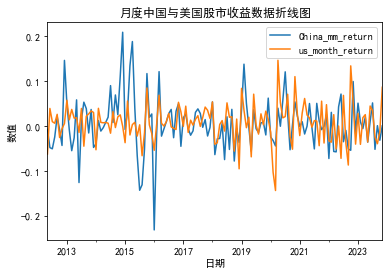

In [4]:
#df['us_month_return'].plot(kind='line')
#df['China_mm_return'].plot(kind='line')
 
df[['China_mm_return', 'us_month_return']].plot(kind='line')  # 同时绘制value1和value2的折线图
plt.title('月度中国与美国股市收益数据折线图')  
plt.xlabel('日期')  
plt.ylabel('数值')

Text(0, 0.5, '数值')

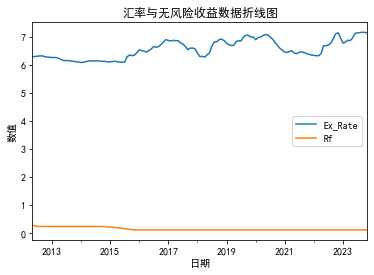

In [5]:
#df['us_month_return'].plot(kind='line')
#df['China_mm_return'].plot(kind='line')

df[['Ex_Rate', 'Rf']].plot(kind='line')  # 同时绘制value1和value2的折线图
plt.title('汇率与无风险收益数据折线图')  
plt.xlabel('日期')  
plt.ylabel('数值')

In [6]:
from statsmodels.tsa.stattools import adfuller


In [7]:
result = adfuller(df['China_mm_return'])
print('ADF Statistic: %f' % result[0],'p-value: %f' % result[1])
result = adfuller(df['us_month_return'])
print('ADF Statistic: %f' % result[0],'p-value: %f' % result[1])
result = adfuller(df['Rf'])
print('ADF Statistic: %f' % result[0],'p-value: %f' % result[1])
result = adfuller(df['Ex_Rate'])
print('ADF Statistic: %f' % result[0],'p-value: %f' % result[1])

ADF Statistic: -9.948388 p-value: 0.000000
ADF Statistic: -10.931771 p-value: 0.000000
ADF Statistic: -2.647884 p-value: 0.083499
ADF Statistic: -1.814302 p-value: 0.373384


In [8]:
df['Ex_Rate_diff'] = df['Ex_Rate'].diff()
df = df.dropna(subset=['Ex_Rate_diff'])  
df['log_Ex_Rate'] = df['Ex_Rate'].apply(np.log)  
result = adfuller(df['log_Ex_Rate'])
print('ADF Statistic: %f' % result[0],'p-value: %f' % result[1])
result = adfuller(df['Ex_Rate_diff'])
print('ADF Statistic: %f' % result[0],'p-value: %f' % result[1])

ADF Statistic: -1.788063 p-value: 0.386404
ADF Statistic: -6.978663 p-value: 0.000000


In [9]:
import statsmodels.tsa.stattools as st
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.arima_model import ARMA

mod = AutoReg(df['China_mm_return'],lags=2)
res = mod.fit()
print(res.summary())

#print("model best lags:",mod.ar_lags)
#即最好的model是加入lag1，lag2与lag3

                            AutoReg Model Results                             
Dep. Variable:        China_mm_return   No. Observations:                  138
Model:                     AutoReg(2)   Log Likelihood                 195.118
Method:               Conditional MLE   S.D. of innovations              0.058
Date:                Thu, 14 Dec 2023   AIC                           -382.235
Time:                        10:56:51   BIC                           -370.585
Sample:                    08-01-2012   HQIC                          -377.501
                         - 11-01-2023                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0063      0.005      1.264      0.206      -0.003       0.016
China_mm_return.L1     0.1690      0.085      1.990      0.047       0.003       0.336
China_mm_return.L2  

D:\Software\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [14]:
order_analyze = st.arma_order_select_ic(df['China_mm_return'], max_ar=3, max_ma=0, ic=['aic'])
print(order_analyze)
print(order_analyze.aic_min_order)

{'aic':             0
0 -387.095127
1 -388.506096
2 -388.373462
3 -386.789837, 'aic_min_order': (1, 0)}
(1, 0)


In [15]:
arma_mod20 = ARIMA(df['China_mm_return'], order=(2, 0, 2)).fit()
print(arma_mod20.summary())

D:\Software\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Software\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Software\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:        China_mm_return   No. Observations:                  138
Model:                 ARIMA(2, 0, 2)   Log Likelihood                 198.663
Date:                Thu, 14 Dec 2023   AIC                           -385.325
Time:                        10:59:02   BIC                           -367.762
Sample:                    06-01-2012   HQIC                          -378.188
                         - 11-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0059      0.005      1.078      0.281      -0.005       0.017
ar.L1          0.5768      0.300      1.925      0.054      -0.011       1.164
ar.L2         -0.6202      0.346     -1.794      0.0

In [16]:
#%%
order_analyze = st.arma_order_select_ic(, max_ar=3, max_ma=3, ic=['aic', 'bic'])
#order_analyze = ar_select_order(df['China_mm_return'], maxlag=10,  ic='aic')
print(order_analyze.aic_min_order)

SyntaxError: invalid syntax (2511475515.py, line 2)

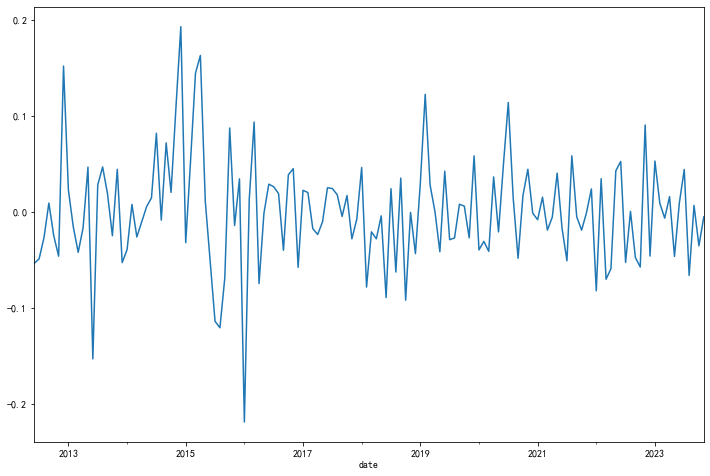

In [17]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
ax = arma_mod20.resid.plot(ax=ax)

In [18]:
import statsmodels.tsa.stattools as st

order_analyze = st.arma_order_select_ic(df['China_mm_return'], max_ar=5, max_ma=5, ic=['aic'])
print(order_analyze)
print(order_analyze.aic_min_order)

D:\Software\Anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Software\Anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Software\Anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Software\Anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Software\Anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimiz

{'aic':             0           1           2           3           4           5
0 -387.095127 -389.236447 -387.761939 -386.566412 -384.570339 -383.686714
1 -388.506096 -387.495400 -386.091165 -384.567632 -383.436160 -381.712513
2 -388.373462 -386.590528 -385.325231 -383.072968 -380.600700 -380.504432
3 -386.789837 -384.831621 -384.245398 -375.250059 -378.633229 -376.972412
4 -384.936149 -383.278984 -381.687714 -380.266741 -376.959736 -376.594971
5 -383.679168 -381.759035 -382.016768 -378.179659 -380.988973 -374.736122, 'aic_min_order': (0, 1)}
(0, 1)


D:\Software\Anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [19]:
from statsmodels.tsa.api import VAR
data = df[['China_mm_return','us_month_return','Ex_Rate_diff','Rf']] ##'China_mm_return','us_month_return','Ex_Rate','Rf' Ex_Rate_diff
#mdata.index = pd.DatetimeIndex(quarterly) 设定时期，之前df已经设定好了，因此不用了
model = VAR(data)
results = model.fit(1)
order_results = model.fit(maxlags=5, ic='aic')
print(order_results.summary())



  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 14, Dec, 2023
Time:                     11:00:34
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -28.0409
Nobs:                     135.000    HQIC:                  -28.7052
Log likelihood:           1254.07    FPE:                2.17284e-13
AIC:                     -29.1600    Det(Omega_mle):     1.50424e-13
--------------------------------------------------------------------
Results for equation China_mm_return
                        coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------
const                     -0.022086         0.016381           -1.348           0.178
L1.China_mm_return         0.135531         0.094760            1.430           0.153
L1.us_month_return        -0.0

D:\Software\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [20]:
lag_order = order_results.k_ar
print(results.forecast(data.values[-lag_order:], 5))
#第一个参数是初始的值，第二个参数是未来要预测多少期，
# model是滞后k期的，就是倒数k个数值作为初始值

[[ 0.00389234 -0.00847539 -0.01554296  0.12344106]
 [ 0.00103192  0.00910535  0.00096414  0.12319679]
 [ 0.00148823  0.00651631  0.00572086  0.12279927]
 [ 0.00149047  0.00718502  0.0079901   0.12239942]
 [ 0.00150279  0.00715006  0.00884593  0.12199385]]


<Figure size 432x288 with 0 Axes>

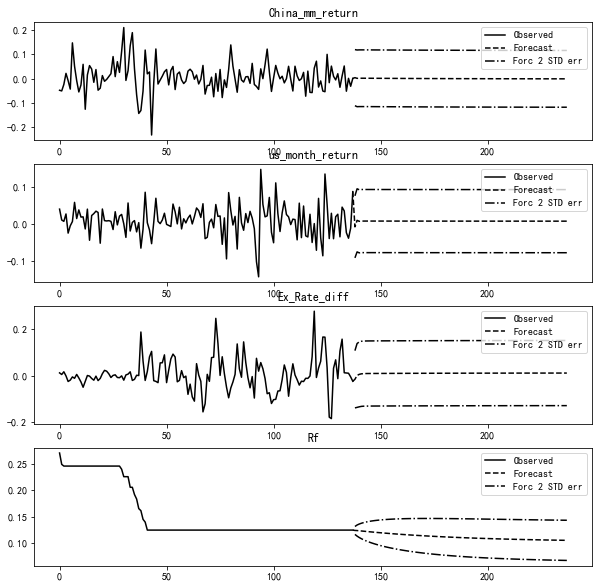

In [21]:
plt.figure()  # 创建一个新的图形窗口  
results.plot_forecast(100)
plt.show()  # 显示图形窗口  
plt.close()  # 关闭当前图形窗口

<Figure size 432x288 with 0 Axes>

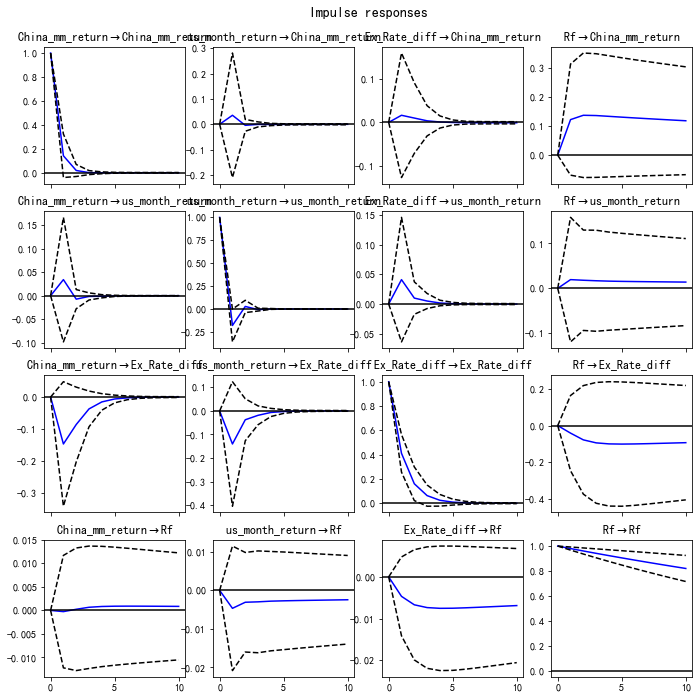

In [89]:
plt.figure()  # 创建一个新的图形窗口  
irf = results.irf(10)
irf.plot()
plt.show()  # 显示图形窗口  
plt.close()  # 关闭当前图形窗口

<Figure size 432x288 with 0 Axes>

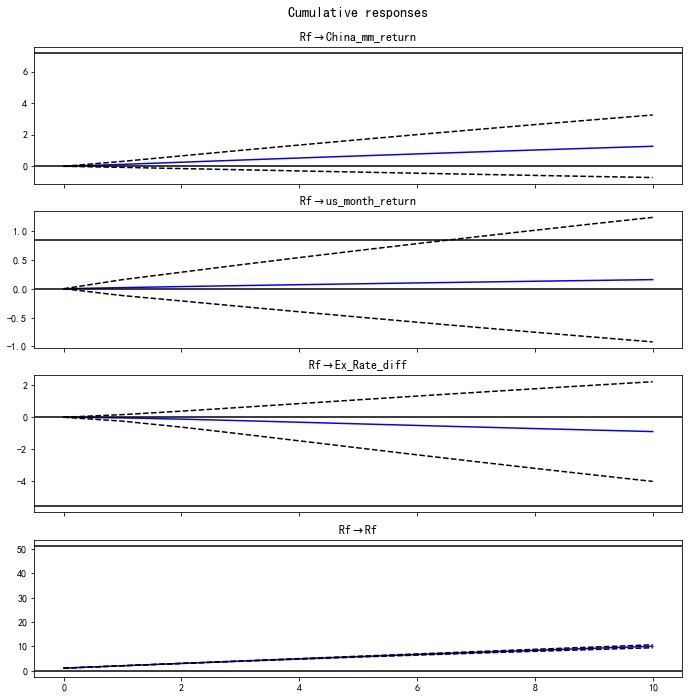

In [90]:
plt.figure()  # 创建一个新的图形窗口  
irf.plot_cum_effects(impulse='Rf')
plt.show()  # 显示图形窗口  
plt.close()  # 关闭当前图形窗口

In [92]:
#第一个参数是果，第二个参数是因
#data = df[['China_mm_return','us_month_return','Ex_Rate','Rf']] ##'China_mm_return','us_month_return','Ex_Rate','Rf'

test1 = results.test_causality('China_mm_return', causing=['Rf'], kind='wald', signif=0.05)
print(test1,test1.pvalue)
#%%
test2 = results.test_causality('us_month_return', causing=['us_month_return'], kind='wald', signif=0.05)
print(test2,test2.pvalue)

#%%
test3 =results.test_causality('China_mm_return', ['us_month_return', 'Ex_Rate_diff'], kind='wald', signif=0.05)
print(test3,test3.pvalue)

<statsmodels.tsa.vector_ar.hypothesis_test_results.CausalityTestResults object. H_0: Rf does not Granger-cause China_mm_return: fail to reject at 5% significance level. Test statistic: 1.574, critical value: 3.841>, p-value: 0.210> 0.20965077960517353
<statsmodels.tsa.vector_ar.hypothesis_test_results.CausalityTestResults object. H_0: us_month_return does not Granger-cause us_month_return: reject at 5% significance level. Test statistic: 3.876, critical value: 3.841>, p-value: 0.049> 0.04897402750119686
<statsmodels.tsa.vector_ar.hypothesis_test_results.CausalityTestResults object. H_0: ['us_month_return', 'Ex_Rate_diff'] do not Granger-cause China_mm_return: fail to reject at 5% significance level. Test statistic: 0.129, critical value: 5.991>, p-value: 0.937> 0.9373145868397358
